<a href="https://colab.research.google.com/github/Pratham8888/Convolutional-Neural-Networks-CNNs-for-Images-/blob/main/Project_Fashion_MNIST_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)


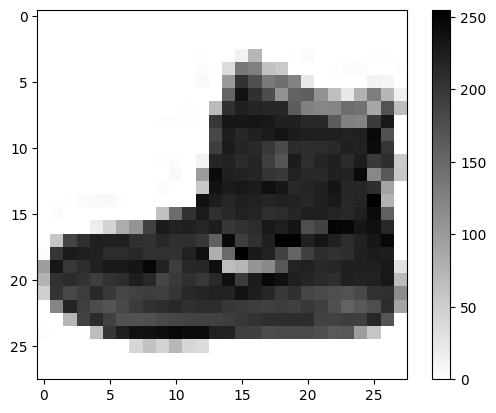

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion-MNIST dataset from Keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define the names for the 10 clothing classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Let's inspect the data
print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)

# Let's look at the first image
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Normalize the pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the images to include the color channel dimension
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Let's check the new shape
print("New shape of training images:", train_images.shape)
print("New shape of testing images:", test_images.shape)

New shape of training images: (60000, 28, 28, 1)
New shape of testing images: (10000, 28, 28, 1)


In [11]:
# Build the Sequential model
model = keras.Sequential([
    # First Convolutional Block
    # The input_shape is specified only in the first layer
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Flatten the feature maps to feed into the Dense layers
    layers.Flatten(),

    # Dense Classifier Head
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 neurons for our 10 classes
])

# Let's see a summary of our model's architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
print("Starting model training...")
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# --- Evaluate the model on the test set ---
print("\nEvaluating model on the test set...")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nAccuracy on Test Set: {test_acc:.2%}")

Starting model training...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7578 - loss: 0.6572 - val_accuracy: 0.8747 - val_loss: 0.3419
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.8819 - loss: 0.3210 - val_accuracy: 0.8945 - val_loss: 0.2950
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8995 - loss: 0.2727 - val_accuracy: 0.9032 - val_loss: 0.2689
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9177 - loss: 0.2277 - val_accuracy: 0.9072 - val_loss: 0.2566
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9247 - loss: 0.2007 - val_accuracy: 0.9129 - val_loss: 0.2422
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9322 - loss: 0.1794 - val_accuracy: 0.9084 - val_loss: 0.2545
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9429 - loss: 0.1570 - val_accuracy: 0.9103 - val_loss: 0.2641
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19m